In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.layers import (
    Input,
    Dense,
    Flatten,
    BatchNormalization,
    AlphaDropout,
    Dropout,
)
from keras.models import Model, save_model, load_model, clone_model, Sequential
from keras.datasets import cifar10
import tensorflow as tf

2025-09-09 18:47:10.656218: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-09 18:47:11.020275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 18:47:12.405675: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

# data shape print
print(f"Train shape: {xtrain.shape}, {ytrain.shape}")
print(f"Test shape: {xtest.shape}, {ytest.shape}")

xtrain = xtrain / 255.0
xtest = xtrain / 255.0

Train shape: (50000, 32, 32, 3), (50000, 1)
Test shape: (10000, 32, 32, 3), (10000, 1)


In [4]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(1024, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(0.1),
    Dense(512, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(0.1),
    Dense(512, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(0.1),
    Dense(256, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(0.1),
    Dense(128, activation='selu', kernel_initializer='lecun_normal'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-09-09 18:47:17.000614: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout (AlphaDropout)    │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_1 (AlphaDropout)  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_2 (AlphaDropout)  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_3 (AlphaDropout)  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099,722 (15.64 MB)

 Trainable params: 4,099,722 (15.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.1060 - loss: 22.5949 - val_accuracy: 0.1014 - val_loss: 3.1655 - learning_rate: 0.0100
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.1143 - loss: 2.3577 - val_accuracy: 0.1022 - val_loss: 3.1643 - learning_rate: 0.0100
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.1275 - loss: 2.3090 - val_accuracy: 0.1073 - val_loss: 2.9353 - learning_rate: 0.0100
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.1355 - loss: 2.2860 - val_accuracy: 0.1044 - val_loss: 2.8877 - learning_rate: 0.0100
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.1364 - loss: 2.2825 - val_accuracy: 0.1158 - val_loss: 2.5977 - learning_rate: 0.0100
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.1436 - loss: 2.2691 - val_accuracy: 0.1208 - val_loss: 2.6264 - learning_rate: 0.0100
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.1508 - loss: 2.2492 -

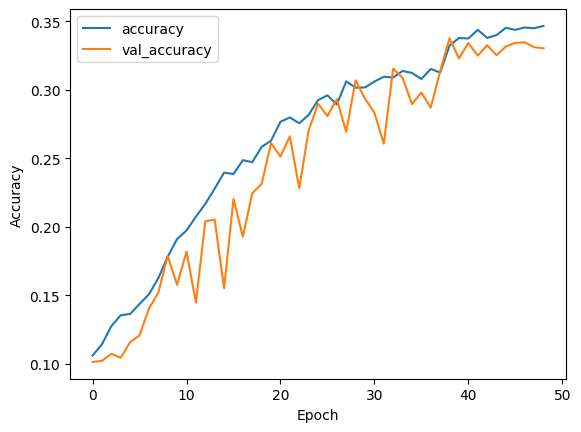

In [5]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_accuracy"),
    keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.2, min_lr=1e-6, monitor="val_accuracy")
]
model_history =  model.fit(xtrain, ytrain, epochs=100, validation_split=0.2, batch_size=1024, callbacks=callbacks)

plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 2, change activation and compare

In [6]:
model2 = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,108,938 (15.67 MB)

 Trainable params: 4,104,330 (15.66 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [7]:
model2_history = model2.fit(xtrain, ytrain, batch_size=1024, validation_split=0.2, epochs=100, callbacks=callbacks)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.2835 - loss: 2.0358 - val_accuracy: 0.1103 - val_loss: 49.2528 - learning_rate: 0.0100
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.3700 - loss: 1.7364 - val_accuracy: 0.2048 - val_loss: 7.2819 - learning_rate: 0.0100
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.4083 - loss: 1.6434 - val_accuracy: 0.3304 - val_loss: 2.0987 - learning_rate: 0.0100
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.4296 - loss: 1.5755 - val_accuracy: 0.3139 - val_loss: 2.1001 - learning_rate: 0.0100
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4430 - loss: 1.5460 - val_accuracy: 0.3396 - val_loss: 1.8582 - learning_rate: 0.0100
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.4663 - loss: 1.4779 - val_accuracy: 0.3423 - val_loss: 1.9186 - learning_rate: 0.0100
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4722 - loss: 1.4615 -

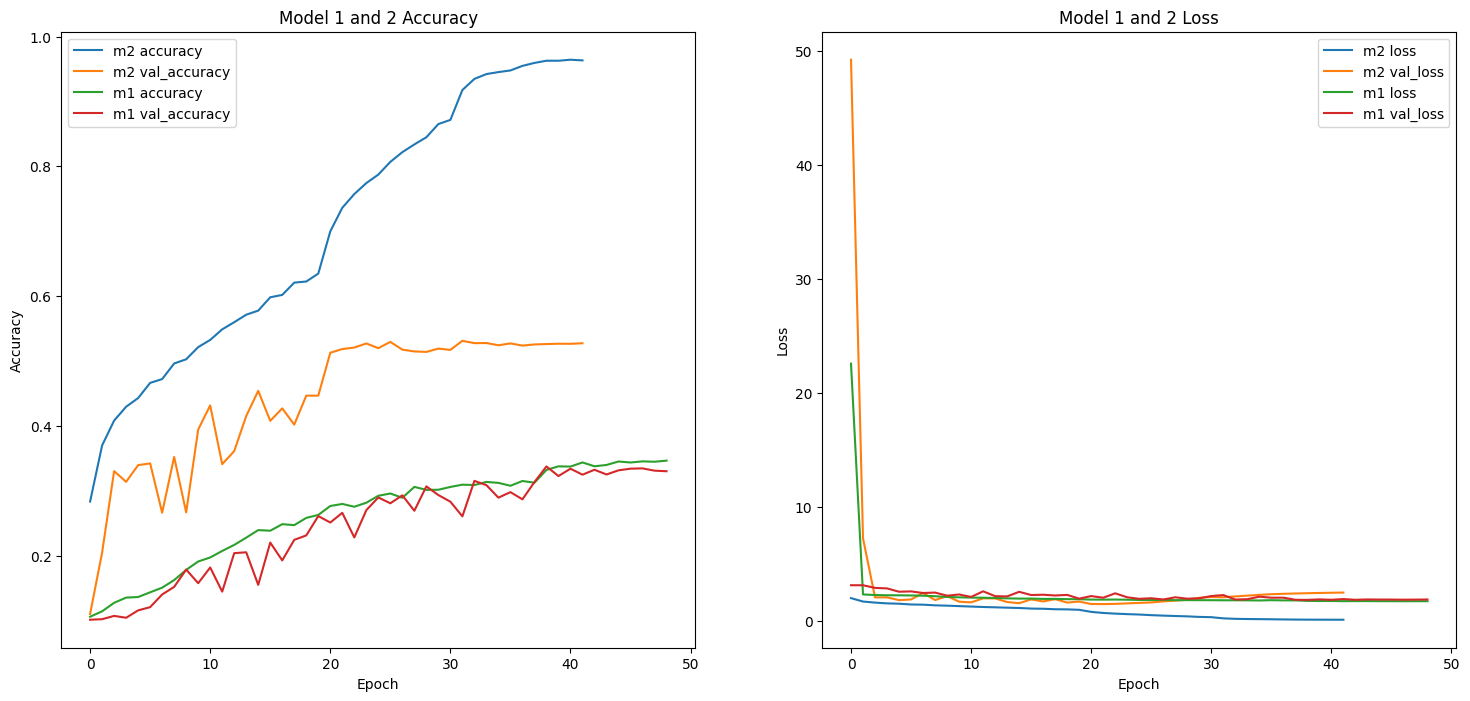

In [8]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 8))

axs1.plot(model2_history.history['accuracy'], label='m2 accuracy')
axs1.plot(model2_history.history['val_accuracy'], label='m2 val_accuracy')
axs1.plot(model_history.history['accuracy'], label='m1 accuracy')
axs1.plot(model_history.history['val_accuracy'], label='m1 val_accuracy')
axs1.set_xlabel('Epoch')
axs1.set_ylabel('Accuracy')
axs1.set_title('Model 1 and 2 Accuracy')
axs1.legend()

axs2.plot(model2_history.history['loss'], label='m2 loss')
axs2.plot(model2_history.history['val_loss'], label='m2 val_loss')
axs2.plot(model_history.history['loss'], label='m1 loss')
axs2.plot(model_history.history['val_loss'], label='m1 val_loss')
axs2.set_xlabel('Epoch')
axs2.set_ylabel('Loss')
axs2.set_title('Model 1 and 2 Loss')
axs2.legend()
plt.show()

# implement model

In [9]:
implement_model = Sequential(model2.layers[:-1])
for l in implement_model.layers:
    l.trainable = False

y_binary_train = np.where(ytrain == 7, 1, 0)
y_binary_test = np.where(ytest == 7, 1, 0)

implement_model.add(keras.layers.Dense(units=1, activation="sigmoid"))
implement_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"], loss="binary_crossentropy")

In [10]:
from sklearn.model_selection import train_test_split

xtrain_sample, _, ytrain_binary_sample, _ = train_test_split(xtrain, y_binary_train, test_size=len(xtrain)-6000, stratify=y_binary_train, random_state=9)

implement_model.fit(xtrain_sample, ytrain_binary_sample, batch_size=512, epochs=50, callbacks=callbacks)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8973 - loss: 0.2670 - learning_rate: 0.0100
Epoch 2/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9560 - loss: 0.1277

/home/aqr/Desktop/DeepLearning/.venv/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/home/aqr/Desktop/DeepLearning/.venv/lib/python3.12/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9567 - loss: 0.1283 - learning_rate: 0.0100
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9638 - loss: 0.1069 - learning_rate: 0.0100
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9683 - loss: 0.0997 - learning_rate: 0.0100
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9697 - loss: 0.0959 - learning_rate: 0.0100
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9712 - loss: 0.0936 - learning_rate: 0.0100
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9720 - loss: 0.0918 - learning_rate: 0.0100
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9733 - loss: 0.0898 - learning_rate: 0.0100
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9737 - loss: 0.0885 - learning_rate: 0.0100
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9730 - loss: 0.0876 - learning_rate: 0.0100
Epoch 11/50
12/12 ━━━━━━━━━━━